# Content with notebooks

You can also create content with Jupyter Notebooks. This means that you can include
code blocks and their outputs in your book.

In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib inline

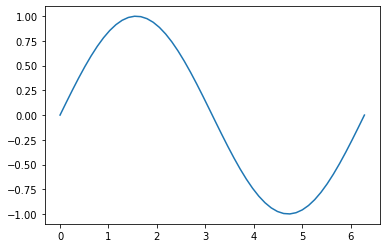

In [2]:
x = np.linspace(0, 2 * np.pi)

def update(w = 1.0):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, np.sin(w * x))

    fig.canvas.draw()

interact(update);

In [3]:
import altair as alt
from vega_datasets import data

movies = alt.UrlData(
    data.movies.url,
    format=alt.DataFormat(parse={"Release_Date":"date"})
)
ratings = ['G', 'NC-17', 'PG', 'PG-13', 'R']
genres = ['Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror', 'Musical',
       'Romantic Comedy', 'Thriller/Suspense', 'Western']

base = alt.Chart(movies, width=200, height=200).mark_point(filled=True).transform_calculate(
    Rounded_IMDB_Rating = "floor(datum.IMDB_Rating)",
    Hundred_Million_Production =  "datum.Production_Budget > 100000000.0 ? 100 : 10",
    Release_Year = "year(datum.Release_Date)"
).transform_filter(
    alt.datum.IMDB_Rating > 0
).transform_filter(
    alt.FieldOneOfPredicate(field='MPAA_Rating', oneOf=ratings)
).encode(
    x=alt.X('Worldwide_Gross:Q', scale=alt.Scale(domain=(100000,10**9), clamp=True)),
    y='IMDB_Rating:Q',
    tooltip="Title:N"
)

# A slider filter
year_slider = alt.binding_range(min=1969, max=2018, step=1)
slider_selection = alt.selection_single(bind=year_slider, fields=['Release_Year'], name="Release Year_")


filter_year = base.add_selection(
    slider_selection
).transform_filter(
    slider_selection
).properties(title="Slider Filtering")

# A dropdown filter
genre_dropdown = alt.binding_select(options=genres)
genre_select = alt.selection_single(fields=['Major_Genre'], bind=genre_dropdown, name="Genre")

filter_genres = base.add_selection(
    genre_select
).transform_filter(
    genre_select
).properties(title="Dropdown Filtering")

#color changing marks
rating_radio = alt.binding_radio(options=ratings)

rating_select = alt.selection_single(fields=['MPAA_Rating'], bind=rating_radio, name="Rating")
rating_color_condition = alt.condition(rating_select,
                      alt.Color('MPAA_Rating:N', legend=None),
                      alt.value('lightgray'))

highlight_ratings = base.add_selection(
    rating_select
).encode(
    color=rating_color_condition
).properties(title="Radio Button Highlighting")

# Boolean selection for format changes
input_checkbox = alt.binding_checkbox()
checkbox_selection = alt.selection_single(bind=input_checkbox, name="Big Budget Films")

size_checkbox_condition = alt.condition(checkbox_selection,
                                        alt.SizeValue(25),
                                        alt.Size('Hundred_Million_Production:Q')
                                       )

budget_sizing = base.add_selection(
    checkbox_selection
).encode(
    size=size_checkbox_condition
).properties(title="Checkbox Formatting")

( filter_year | filter_genres) &  (highlight_ratings | budget_sizing  )

alt.VConcatChart(...)

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://executablebooks.github.io/cli/start/overview.html)